<a href="https://colab.research.google.com/github/VaidehiBisen14/DEEPLEARNINGVaidehi/blob/main/DLPR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
np.random.seed(0)

X = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
degrees = [1, 4, 15]

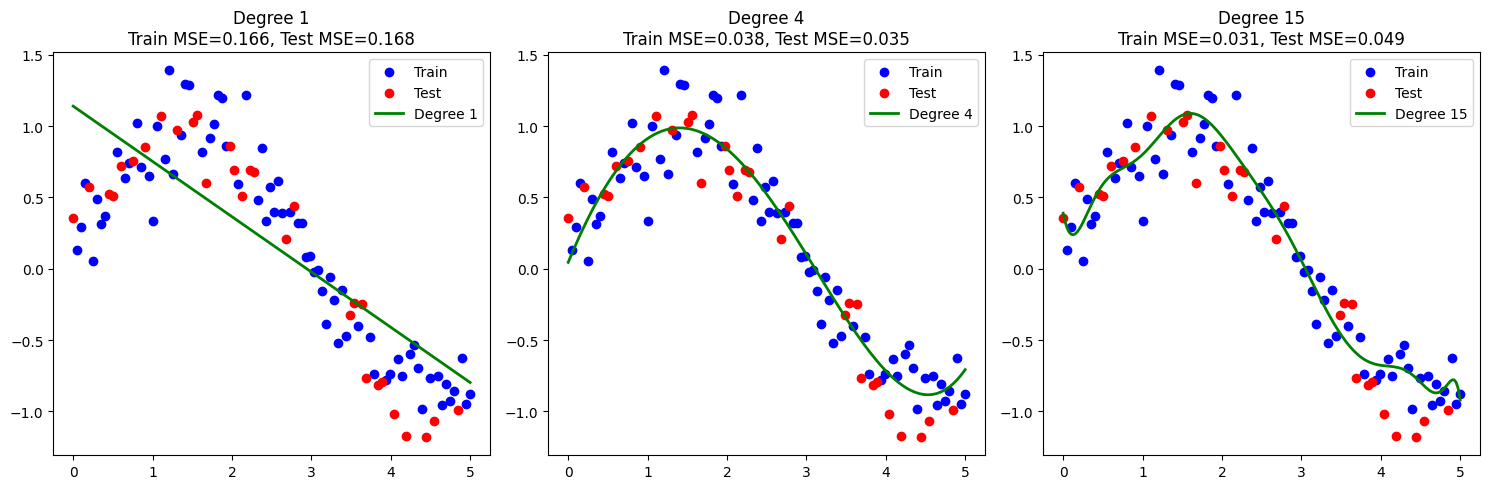

In [5]:
plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees, 1):
    # Polynomial transformation
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color="blue", label="Train")
    plt.scatter(X_test, y_test, color="red", label="Test")

    # Curve
    X_curve = np.linspace(0, 5, 200).reshape(-1, 1)
    y_curve = model.predict(poly.transform(X_curve))
    plt.plot(X_curve, y_curve, color="green", linewidth=2, label=f"Degree {d}")

    plt.title(f"Degree {d}\nTrain MSE={train_mse:.3f}, Test MSE={test_mse:.3f}")
    plt.legend()

plt.tight_layout()
plt.show()